# Импорт библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import random
import numpy as np

from collections import Counter

In [2]:
data = pd.read_excel('ТЗ Аналитик данных.xlsx')

# Знакомство с данными

In [3]:
data.head()

,заказчик,дата публикации,дата завершения,дата первой публикации,тип,Категория закупки,"Оборот компании, млрд. руб",Отрасль заказчика,причина_отмены_публикации,Менеджер Bidzaar,колво участников тендера с приглашением,"колво участников, подавших минимум одно предложение",колво победителей тендера,Оплаченная комиссия
0,WPP,2021-10-22,2021-11-06,2021-11-08,открытая,NaN,4.5,Нон-фуд ритейл,NaN,Иванова,1211,27,NaN,0.000000
1,WPP,2021-09-20,2021-10-18,2021-11-08,открытая,NaN,4.5,Нон-фуд ритейл,NaN,Иванова,1323,30,NaN,0.000000
2,WPP,2021-10-19,2021-10-27,2021-11-08,открытая,NaN,4.5,Нон-фуд ритейл,NaN,Иванова,192,13,NaN,0.000000
3,WPP,2021-10-28,2021-11-03,2021-11-08,открытая,NaN,4.5,Нон-фуд ритейл,NaN,Иванова,1211,17,NaN,0.000000
4,WPP,2021-12-19,2022-03-22,2021-11-08,открытая,NaN,4.5,Нон-фуд ритейл,NaN,Иванова,209,6,1.0,13411.523469


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5439 entries, 0 to 5438
Data columns (total 14 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   заказчик                                             5439 non-null   object        
 1   дата публикации                                      5439 non-null   datetime64[ns]
 2   дата завершения                                      4817 non-null   datetime64[ns]
 3   дата первой публикации                               5439 non-null   datetime64[ns]
 4   тип                                                  5439 non-null   object        
 5   Категория закупки                                    3246 non-null   object        
 6   Оборот компании, млрд. руб                           5439 non-null   float64       
 7   Отрасль заказчика                                    5439 non-null   object        
 8 

## Изменение названий  столбцов

In [5]:
data.columns = data.columns.str.lower().str.replace(' ', '_')
data = data.rename(columns = {'заказчик':'customer', 
                       'дата_публикации':'publication_date', 
                       'дата_завершения':'completion_date',
                       'дата_первой_публикации':'first_publication_date', 
                       'тип':'type', 
                       'категория_закупки':'procurement_category',
                       'оборот_компании,_млрд._руб':'company_turnover_in_billion_rubles', 
                       'отрасль_заказчика':'customer_industry',
                       'причина_отмены_публикации':'reason_for_publication_cancellation',
                       'менеджер_bidzaar':'bidzaar_manager',
                       'колво_участников_тендера_с_приглашением':'number_of_tender_participants_with_invitation',
                       'колво_участников,_подавших_минимум_одно_предложение':'number_of_participants_who_submitted_at',
                       'колво_победителей_тендера':'number_of_tender_winners', 
                       'оплаченная_комиссия':'paid_commission'})

In [6]:
data.columns

Index(['customer', 'publication_date', 'completion_date',
       'first_publication_date', 'type', 'procurement_category',
       'company_turnover_in_billion_rubles', 'customer_industry',
       'reason_for_publication_cancellation', 'bidzaar_manager',
       'number_of_tender_participants_with_invitation',
       'number_of_participants_who_submitted_at', 'number_of_tender_winners',
       'paid_commission'],
      dtype='object')

# Обработка пропусков 

In [7]:
data.isna().sum()

customer                                            0
publication_date                                    0
completion_date                                   622
first_publication_date                              0
type                                                0
procurement_category                             2193
company_turnover_in_billion_rubles                  0
customer_industry                                   0
reason_for_publication_cancellation              5298
bidzaar_manager                                     0
number_of_tender_participants_with_invitation       0
number_of_participants_who_submitted_at             0
number_of_tender_winners                         2223
paid_commission                                     0
dtype: int64

### completion_date

In [8]:
# Проверка пропусков в дате завершения (completion_date)
data[data['completion_date'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 622 entries, 17 to 5438
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   customer                                       622 non-null    object        
 1   publication_date                               622 non-null    datetime64[ns]
 2   completion_date                                0 non-null      datetime64[ns]
 3   first_publication_date                         622 non-null    datetime64[ns]
 4   type                                           622 non-null    object        
 5   procurement_category                           436 non-null    object        
 6   company_turnover_in_billion_rubles             622 non-null    float64       
 7   customer_industry                              622 non-null    object        
 8   reason_for_publication_cancellation            0 non-null      

In [9]:
# data[data['completion_date'].isna()]['reason_for_publication_cancellation'].nunique()

In [10]:
data[data['completion_date'].isna()]['number_of_tender_winners'].sum()

np.float64(0.0)

<div class="alert alert-block alert-success">    
Так как количество победителей равно нулю и причины отмены неуказаны, то можно сделать вывод, что пропуски в дате завершения связаны с тем, что публикация ещё в работе.


### procurement_category

In [11]:
data['procurement_category'] = data['procurement_category'].fillna('Нет категории')

In [12]:
data['procurement_category'].value_counts()

procurement_category
Нет категории                          2193
ИТ                                      664
СМР/ПИР                                 646
Услуги для бизнеса                      642
Упаковка и оборотная тара               338
Реклама, маркетинг, PR                  266
АХО                                     225
Складское/торговое оборудование ЗИП     182
Промышленное оборудование                82
Специализированное оборудование          70
Продажа                                  63
Автомобили                               43
Производство                             25
Name: count, dtype: int64

In [13]:
data.isna().sum()

customer                                            0
publication_date                                    0
completion_date                                   622
first_publication_date                              0
type                                                0
procurement_category                                0
company_turnover_in_billion_rubles                  0
customer_industry                                   0
reason_for_publication_cancellation              5298
bidzaar_manager                                     0
number_of_tender_participants_with_invitation       0
number_of_participants_who_submitted_at             0
number_of_tender_winners                         2223
paid_commission                                     0
dtype: int64

### number_of_tender_winners

In [14]:
data['number_of_tender_winners'].isna().sum()

np.int64(2223)

In [15]:
data[data['number_of_tender_winners'].isna()]['paid_commission'].sum()

np.float64(38635.55122063376)

In [16]:
# data.loc[data['number_of_tender_winners'].isna() & (data['paid_commission'] == 0), 'number_of_tender_winners'] = 0

In [17]:
data['number_of_tender_winners'] = data['number_of_tender_winners'].fillna(0)

In [18]:
data[data['reason_for_publication_cancellation'].isna()]

,customer,publication_date,completion_date,first_publication_date,type,procurement_category,company_turnover_in_billion_rubles,customer_industry,reason_for_publication_cancellation,bidzaar_manager,number_of_tender_participants_with_invitation,number_of_participants_who_submitted_at,number_of_tender_winners,paid_commission
0,WPP,2021-10-22,2021-11-06,2021-11-08,открытая,Нет категории,4.5,Нон-фуд ритейл,NaN,Иванова,1211,27,0.0,0.000000
1,WPP,2021-09-20,2021-10-18,2021-11-08,открытая,Нет категории,4.5,Нон-фуд ритейл,NaN,Иванова,1323,30,0.0,0.000000
2,WPP,2021-10-19,2021-10-27,2021-11-08,открытая,Нет категории,4.5,Нон-фуд ритейл,NaN,Иванова,192,13,0.0,0.000000
3,WPP,2021-10-28,2021-11-03,2021-11-08,открытая,Нет категории,4.5,Нон-фуд ритейл,NaN,Иванова,1211,17,0.0,0.000000
4,WPP,2021-12-19,2022-03-22,2021-11-08,открытая,Нет категории,4.5,Нон-фуд ритейл,NaN,Иванова,209,6,1.0,13411.523469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5434,Citic Pacific,2023-01-06,2023-02-22,2021-10-06,открытая,Складское/торговое оборудование ЗИП,10.0,Нон-фуд ритейл,NaN,Тех.Поддержка,873,48,1.0,13983.270452
5435,Citic Pacific,2023-05-06,NaT,2021-10-06,открытая,"Реклама, маркетинг, PR",10.0,Нон-фуд ритейл,NaN,Тех.Поддержка,1247,5,0.0,0.000000
5436,Citic Pacific,2023-03-24,NaT,2021-10-06,открытая,"Реклама, маркетинг, PR",10.0,Нон-фуд ритейл,NaN,Тех.Поддержка,1252,4,0.0,0.000000
5437,Citic Pacific,2023-05-01,NaT,2021-10-06,открытая,Упаковка и оборотная тара,10.0,Нон-фуд ритейл,NaN,Тех.Поддержка,784,13,0.0,0.000000


In [19]:
data['number_of_tender_winners'].isna().sum()

np.int64(0)

# Удаление дублей

In [20]:
data.duplicated().sum()

np.int64(20)

In [21]:
data[data.duplicated(keep = False)].sort_values(by = ['publication_date'])

,customer,publication_date,completion_date,first_publication_date,type,procurement_category,company_turnover_in_billion_rubles,customer_industry,reason_for_publication_cancellation,bidzaar_manager,number_of_tender_participants_with_invitation,number_of_participants_who_submitted_at,number_of_tender_winners,paid_commission
3090,Saint-Gobain,2020-12-19,2020-12-20,2019-10-10,закрытая,Нет категории,43.38,Нон-фуд ритейл,NaN,Шредер,5,3,1.0,0.0
3207,Saint-Gobain,2020-12-19,2020-12-20,2019-10-10,закрытая,Нет категории,43.38,Нон-фуд ритейл,NaN,Шредер,5,3,1.0,0.0
3089,Saint-Gobain,2021-01-09,2021-01-10,2019-10-10,закрытая,Нет категории,43.38,Нон-фуд ритейл,NaN,Шредер,3,2,1.0,0.0
3098,Saint-Gobain,2021-01-09,2021-01-10,2019-10-10,закрытая,Нет категории,43.38,Нон-фуд ритейл,NaN,Шредер,3,2,1.0,0.0
3113,Saint-Gobain,2021-01-16,2021-01-17,2019-10-10,закрытая,Нет категории,43.38,Нон-фуд ритейл,NaN,Шредер,2,2,1.0,0.0
3386,Saint-Gobain,2021-01-16,2021-01-17,2019-10-10,закрытая,Нет категории,43.38,Нон-фуд ритейл,NaN,Шредер,2,2,1.0,0.0
3047,Saint-Gobain,2021-01-22,2021-01-23,2019-10-10,закрытая,Нет категории,43.38,Нон-фуд ритейл,NaN,Шредер,3,3,1.0,0.0
3321,Saint-Gobain,2021-01-22,2021-01-23,2019-10-10,закрытая,Нет категории,43.38,Нон-фуд ритейл,NaN,Шредер,3,3,1.0,0.0
3141,Saint-Gobain,2021-01-29,2021-02-01,2019-10-10,закрытая,Нет категории,43.38,Нон-фуд ритейл,NaN,Шредер,3,3,1.0,0.0
3118,Saint-Gobain,2021-01-29,2021-02-01,2019-10-10,закрытая,Нет категории,43.38,Нон-фуд ритейл,NaN,Шредер,3,3,1.0,0.0


In [22]:
data = data.drop_duplicates()

In [23]:
data.duplicated().sum()

np.int64(0)

# Добавление столбцов

## ID

In [24]:
data['ID'] = (data['customer'].str[0] + data['customer'].str[1] + data['customer'].str[-1] + "-" + (data.index.astype(int) + random.randint(10000, 100000)).astype(str)).str.upper()

In [25]:
data.duplicated(subset = 'ID').sum()

np.int64(0)

## Status

In [26]:
data['Status'] = np.nan

In [27]:
data.loc[data['completion_date'] == data['completion_date'], 'Status'] = 'Completed'
data.loc[data['completion_date'] != data['completion_date'], 'Status'] = 'In progress'
data.loc[data['reason_for_publication_cancellation'] == data['reason_for_publication_cancellation'], 'Status'] = 'Canceled'

/var/folders/tx/fz_18w2n0m9d7n1sblwsw1rw0000gn/T/ipykernel_48279/391771673.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Completed' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[data['completion_date'] == data['completion_date'], 'Status'] = 'Completed'


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5419 entries, 0 to 5438
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   customer                                       5419 non-null   object        
 1   publication_date                               5419 non-null   datetime64[ns]
 2   completion_date                                4797 non-null   datetime64[ns]
 3   first_publication_date                         5419 non-null   datetime64[ns]
 4   type                                           5419 non-null   object        
 5   procurement_category                           5419 non-null   object        
 6   company_turnover_in_billion_rubles             5419 non-null   float64       
 7   customer_industry                              5419 non-null   object        
 8   reason_for_publication_cancellation            141 non-null    

In [29]:
data['Status'].unique()

array(['Completed', 'In progress', 'Canceled'], dtype=object)

## Длительность тендера (в днях)

In [30]:
data['duration_days'] = (data['completion_date'] - data['publication_date']).dt.days

## Год и месяц публикации

In [31]:
# 4.5. Год и месяц публикации
data['pub_year'] = data['publication_date'].dt.year
data['pub_month'] = data['publication_date'].dt.month

In [32]:
data

,customer,publication_date,completion_date,first_publication_date,type,procurement_category,company_turnover_in_billion_rubles,customer_industry,reason_for_publication_cancellation,bidzaar_manager,number_of_tender_participants_with_invitation,number_of_participants_who_submitted_at,number_of_tender_winners,paid_commission,ID,Status,duration_days,pub_year,pub_month
0,WPP,2021-10-22,2021-11-06,2021-11-08,открытая,Нет категории,4.5,Нон-фуд ритейл,NaN,Иванова,1211,27,0.0,0.000000,WPP-65728,Completed,15.0,2021,10
1,WPP,2021-09-20,2021-10-18,2021-11-08,открытая,Нет категории,4.5,Нон-фуд ритейл,NaN,Иванова,1323,30,0.0,0.000000,WPP-65729,Completed,28.0,2021,9
2,WPP,2021-10-19,2021-10-27,2021-11-08,открытая,Нет категории,4.5,Нон-фуд ритейл,NaN,Иванова,192,13,0.0,0.000000,WPP-65730,Completed,8.0,2021,10
3,WPP,2021-10-28,2021-11-03,2021-11-08,открытая,Нет категории,4.5,Нон-фуд ритейл,NaN,Иванова,1211,17,0.0,0.000000,WPP-65731,Completed,6.0,2021,10
4,WPP,2021-12-19,2022-03-22,2021-11-08,открытая,Нет категории,4.5,Нон-фуд ритейл,NaN,Иванова,209,6,1.0,13411.523469,WPP-65732,Completed,93.0,2021,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5434,Citic Pacific,2023-01-06,2023-02-22,2021-10-06,открытая,Складское/торговое оборудование ЗИП,10.0,Нон-фуд ритейл,NaN,Тех.Поддержка,873,48,1.0,13983.270452,CIC-71162,Completed,47.0,2023,1
5435,Citic Pacific,2023-05-06,NaT,2021-10-06,открытая,"Реклама, маркетинг, PR",10.0,Нон-фуд ритейл,NaN,Тех.Поддержка,1247,5,0.0,0.000000,CIC-71163,In progress,NaN,2023,5
5436,Citic Pacific,2023-03-24,NaT,2021-10-06,открытая,"Реклама, маркетинг, PR",10.0,Нон-фуд ритейл,NaN,Тех.Поддержка,1252,4,0.0,0.000000,CIC-71164,In progress,NaN,2023,3
5437,Citic Pacific,2023-05-01,NaT,2021-10-06,открытая,Упаковка и оборотная тара,10.0,Нон-фуд ритейл,NaN,Тех.Поддержка,784,13,0.0,0.000000,CIC-71165,In progress,NaN,2023,5


## Participation Rate

In [33]:
# Конверсия из приглашенных в поданные предложения
data['participation_rate'] = np.where(
    data['number_of_tender_participants_with_invitation'] > 0,
    data['number_of_participants_who_submitted_at'] / data['number_of_tender_participants_with_invitation'],
    0
)

## Успешный тендер

In [34]:
data['is_successful'] = np.where(data['number_of_tender_winners'] > 0, 1, 0)

## Категории причин отмены

In [35]:
data['reason_for_publication_cancellation'].unique()

array([nan, 'Нет подходящих предложений',
       'Отпала потребность в проведении запроса',
       'К сожалению, ставки текущего поставщика ниже ставок в тендере. Спасибо!',
       'Ставки текущего поставщика ниже предложенных. Спасибо за участие!',
       'Данный тендер был размещен в качестве мониторинга предложений и не предполагал заказ.',
       'Нет участников.',
       'Предложенные тарифы выше текущих. Спасибо за участие!',
       'Нет предложений',
       'Уважаемые участники!\nБлагодарим за предоставленные коммерческие предложения.\nТендерным комитетом принято решение продолжить сотрудничество с действующим поставщиком.\nУчастники, предоставившие лучшие коммерческие предложения в ходе тендера, будут рассматриваться в качестве приоритетных партнеров, если возникнет необходимость в смене действующего партнера или дополнительных закупках услуг, являвшихся предметом тендера.',
       '.', 'Сменилась спецификация запроса',
       'Информируем о продолжении закупочной процедуры с н

In [36]:
# Объедините все строки в столбце в один текст и разделите их на слова
words = data['reason_for_publication_cancellation'].str.cat(sep=' ').split()

# Подсчитайте количество каждого слова
word_counts = Counter(words)

word_counts_data = pd.DataFrame(word_counts.items(), columns = ['Word','Count'])

In [37]:
# word_counts_data.sort_values('Count', ascending = False).head(50)

In [38]:
# Убедитесь, что у вас есть DataFrame 'data' и столбец 'reason_for_publication_cancellation'
# Перед началом категоризации рекомендуется инициализировать новый столбец 'категория' значением по умолчанию
# data['категория'] = 'Прочее'

# 1. Выгодные условия (Текущий поставщик)
# Расширенные ключевые слова: текущ, ниже, выгодн, улучшен, вне ЭТП, заказ от производителя, победитель
data.loc[data['reason_for_publication_cancellation'].str.contains(
    'текущ[ийеая]{0,2}\s+поставщик|ниже|выгодн[оеых]{0,2}|улучшен[ые]{0,2}|вне\s+ЭТП|заказ\s+от\s+производителя|победител[ьей]',
    case=False, na=False), 'категория'] = 'Выгодные условия (Текущий поставщик)'

# 2. Нет предложений/Участников
# Расширенные ключевые слова: нет предлож, нет участник, не подано, не нашли поставщика, не соответств
data.loc[data['reason_for_publication_cancellation'].str.contains(
    'нет\s+предлож[енийя]{0,3}|нет\s+участник[ов]{0,2}|не\s+подано|не\s+нашли\s+поставщика|не\s+соответств[ует]{0,3}',
    case=False, na=False), 'категория'] = 'Нет предложений/Участников'

# 3. Корректировка/Повторный запрос
# Расширенные ключевые слова: корректировк, повторн, перезапрос, сменилась спецификаци, изменени[ея] спецификаци, изменени[ея] ТЗ, дублировани
data.loc[data['reason_for_publication_cancellation'].str.contains(
    'корректировк[аи]{0,2}|повторн[ыйео]{0,2}|перезапрос|сменилась\s+спецификаци[яи]{0,2}|изменени[ея]\s+спецификаци[яи]{0,2}|изменени[ея]\s+ТЗ|дублировани[ея]',
    case=False, na=False), 'категория'] = 'Корректировка/Повторный запрос'

# 4. Выбор поставщика (КА)
# Расширенные ключевые слова: выбран пул, КА, квалификаци, тестировани, аккредитаци
data.loc[data['reason_for_publication_cancellation'].str.contains(
    'выбран\s+пул| КА|квалификаци[яи]{0,2}|тестировани[ея]{0,2}|аккредитаци[яи]{0,2}',
    case=False, na=False), 'категория'] = 'Выбор поставщика (КА)'

# 5. Мониторинг/Не предполагал заказ
# Расширенные ключевые слова: мониторинг, не предполагал заказ
data.loc[data['reason_for_publication_cancellation'].str.contains(
    'мониторинг|не\s+предполагал\s+заказ',
    case=False, na=False), 'категория'] = 'Мониторинг/Не предполагал заказ'

# 6. Неактуальность/Отмена (Общие причины)
# Расширенные ключевые слова: отпала потребность, не актуален, отмена, прекращени
data.loc[data['reason_for_publication_cancellation'].str.contains(
    'отпала\s+потребность|не\s+актуален|отмен[аы]{0,2}|прекращени[ея]',
    case=False, na=False), 'категория'] = 'Неактуальность/Отмена'

# 7. Прочее/Техническое
# Ключевые слова: nan, -, ., долгое подведение итогов, прочие символы
data.loc[data['reason_for_publication_cancellation'].str.contains(
    'nan|^\s*[-.]\s*$|долгое\s+подведение\s+итогов|^\s*,\s*$|^\s*$',
    case=False, na=False), 'категория'] = 'Прочее/Техническое'


In [39]:
data['категория'].isna().sum()

np.int64(5331)

# Графики

In [40]:
data['pub_year_month'] = data['publication_date'].dt.to_period('M')

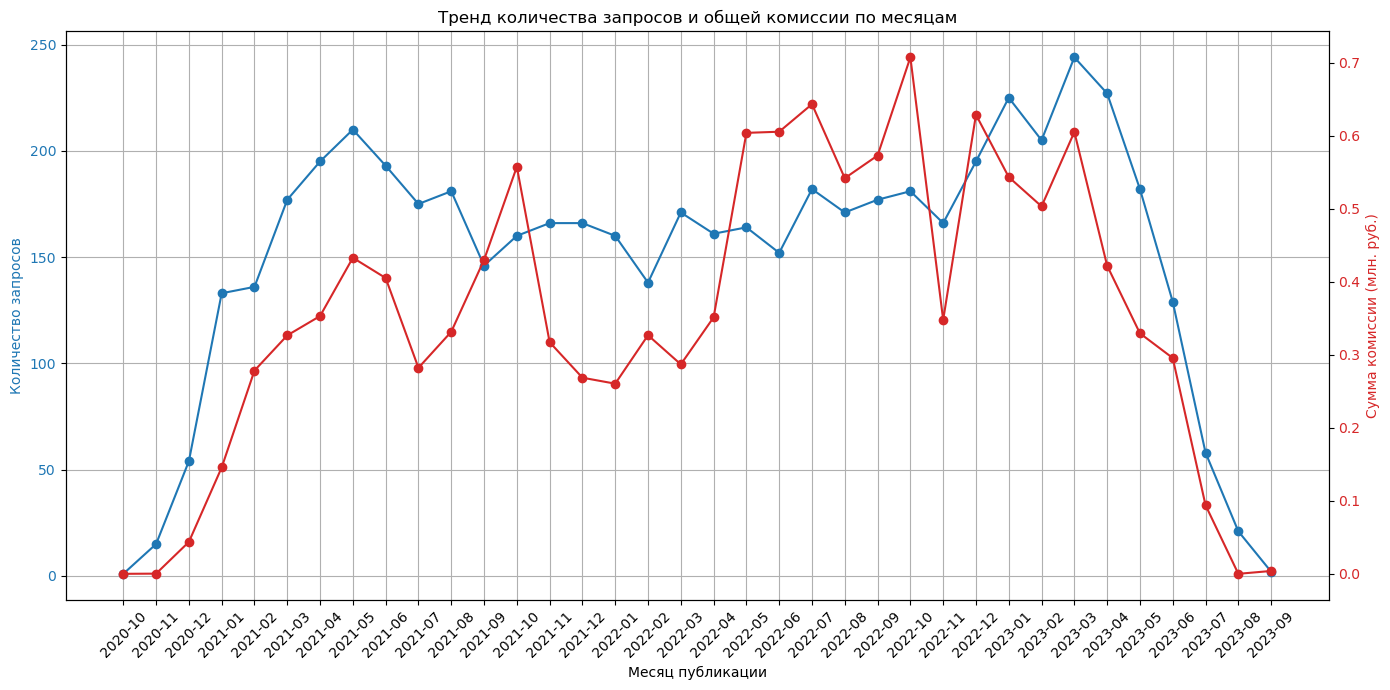

In [41]:
# 1. Тренд по количеству запросов и общей комиссии
time_series_data = data.groupby('pub_year_month').agg(
    total_requests=('customer', 'count'),
    total_commission=('paid_commission', 'sum')
).reset_index()
time_series_data['pub_year_month'] = time_series_data['pub_year_month'].astype(str)

fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:blue'
ax1.set_xlabel('Месяц публикации')
ax1.set_ylabel('Количество запросов', color=color)
ax1.plot(time_series_data['pub_year_month'], time_series_data['total_requests'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True)

ax2 = ax1.twinx()  # Создание второй оси Y
color = 'tab:red'
ax2.set_ylabel('Сумма комиссии (млн. руб.)', color=color)
ax2.plot(time_series_data['pub_year_month'], time_series_data['total_commission'] / 1000000, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Тренд количества запросов и общей комиссии по месяцам')
plt.tight_layout()
# plt.savefig('/home/ubuntu/bidzaar_analysis/trend_requests_commission.png')
# plt.close()

## Анализ конверсии по категориям закупки

In [42]:
category_conversion = data.groupby('procurement_category').agg(
    total_requests=('customer', 'count'),
    avg_participation_rate=('participation_rate', 'mean'),
    success_rate=('is_successful', 'mean'), avg_commission = ('paid_commission', 'mean')
).reset_index().sort_values(by = 'total_requests', ascending = False)

In [43]:
category_conversion

,procurement_category,total_requests,avg_participation_rate,success_rate,avg_commission
3,Нет категории,2173,0.384362,0.633226,1988.095459
2,ИТ,664,0.075469,0.698795,3132.765038
8,СМР/ПИР,646,0.060148,0.523220,2384.137082
12,Услуги для бизнеса,642,0.164453,0.618380,1706.746276
11,Упаковка и оборотная тара,338,0.183058,0.461538,2676.388647
7,"Реклама, маркетинг, PR",266,0.113458,0.556391,3634.749909
0,АХО,225,0.034248,0.404444,2450.178984
9,Складское/торговое оборудование ЗИП,182,0.074959,0.483516,2719.770659
6,Промышленное оборудование,82,0.025416,0.512195,3665.620057
10,Специализированное оборудование,70,0.063213,0.457143,2668.661800


## Средний процент участия по категориям

/var/folders/tx/fz_18w2n0m9d7n1sblwsw1rw0000gn/T/ipykernel_48279/376078460.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_participation_rate', y='procurement_category', data=category_conversion.sort_values(by='avg_participation_rate', ascending=False), palette='viridis')


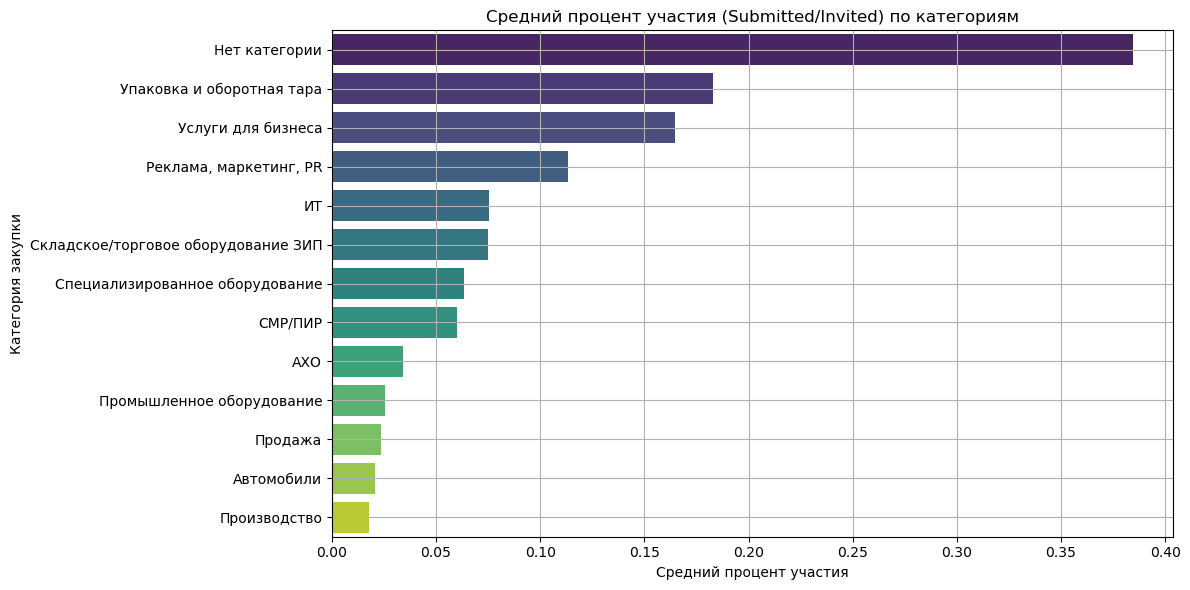

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(x='avg_participation_rate', y='procurement_category', data=category_conversion.sort_values(by='avg_participation_rate', ascending=False), palette='viridis')
plt.title('Средний процент участия (Submitted/Invited) по категориям')
plt.xlabel('Средний процент участия')
plt.ylabel('Категория закупки')
plt.grid()
plt.tight_layout()

In [45]:
avg_commission

NameError: name 'avg_commission' is not defined

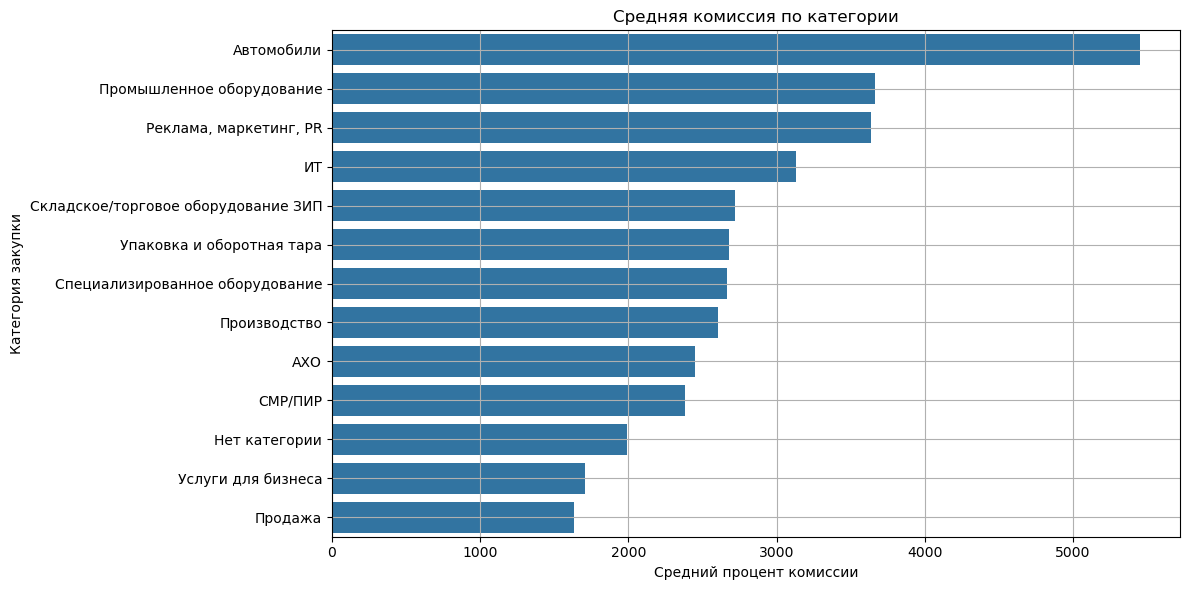

In [46]:
plt.figure(figsize=(12, 6))
sns.barplot(x='avg_commission', y='procurement_category', data=category_conversion.sort_values(by='avg_commission', ascending=False))
plt.title('Средняя комиссия по категории')
plt.xlabel('Средний процент комиссии')
plt.ylabel('Категория закупки')
plt.grid()
plt.tight_layout()

In [47]:
# Без пропусков в категории
category_conversion_2 = category_conversion.query('procurement_category != "Нет категории"')

/var/folders/tx/fz_18w2n0m9d7n1sblwsw1rw0000gn/T/ipykernel_48279/1835396629.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_participation_rate', y='procurement_category', data=category_conversion_2.sort_values(by='avg_participation_rate', ascending=False), palette='viridis')


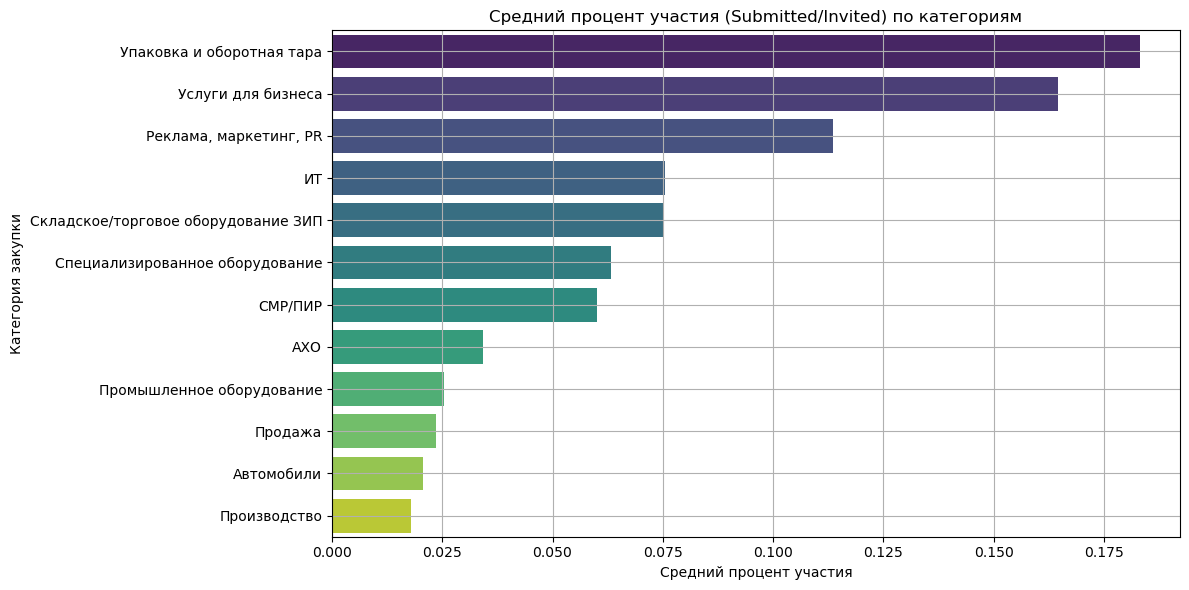

In [48]:
plt.figure(figsize=(12, 6))
sns.barplot(x='avg_participation_rate', y='procurement_category', data=category_conversion_2.sort_values(by='avg_participation_rate', ascending=False), palette='viridis')
plt.title('Средний процент участия (Submitted/Invited) по категориям')
plt.xlabel('Средний процент участия')
plt.ylabel('Категория закупки')
plt.grid()
plt.tight_layout()

## Процент успешных тендеров по категориям

/var/folders/tx/fz_18w2n0m9d7n1sblwsw1rw0000gn/T/ipykernel_48279/3328275444.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='success_rate', y='procurement_category', data=category_conversion.sort_values(by='success_rate', ascending=False), palette='magma')


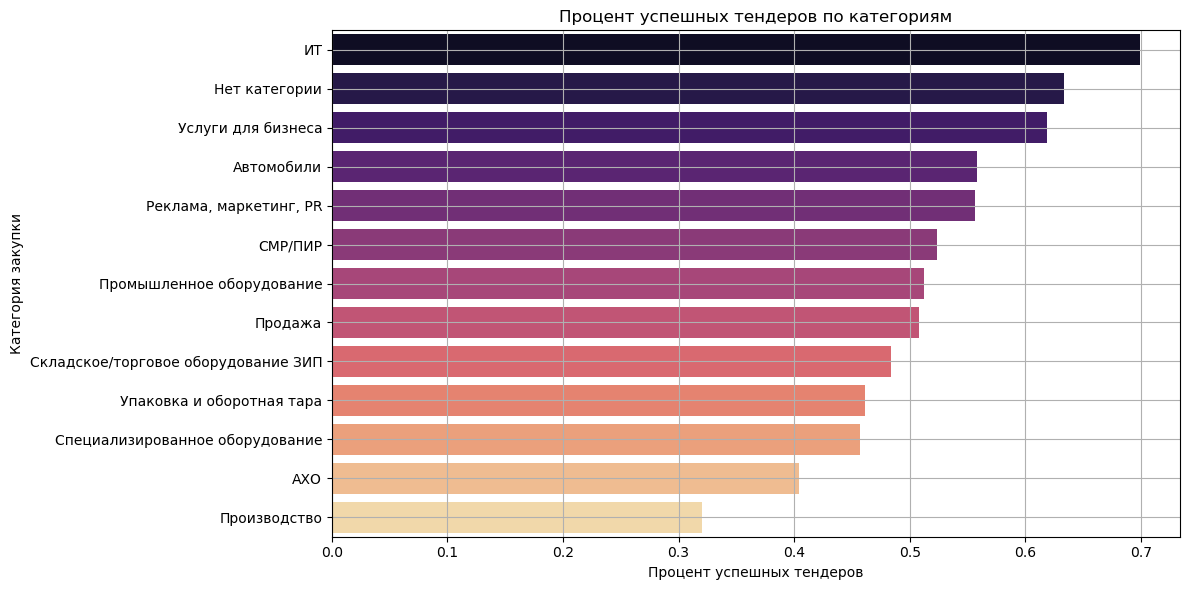

In [49]:
plt.figure(figsize=(12, 6))
sns.barplot(x='success_rate', y='procurement_category', data=category_conversion.sort_values(by='success_rate', ascending=False), palette='magma')
plt.title('Процент успешных тендеров по категориям')
plt.xlabel('Процент успешных тендеров')
plt.ylabel('Категория закупки')
plt.grid()
plt.tight_layout()

/var/folders/tx/fz_18w2n0m9d7n1sblwsw1rw0000gn/T/ipykernel_48279/1743560982.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='success_rate', y='procurement_category', data=category_conversion_2.sort_values(by='success_rate', ascending=False), palette='magma')


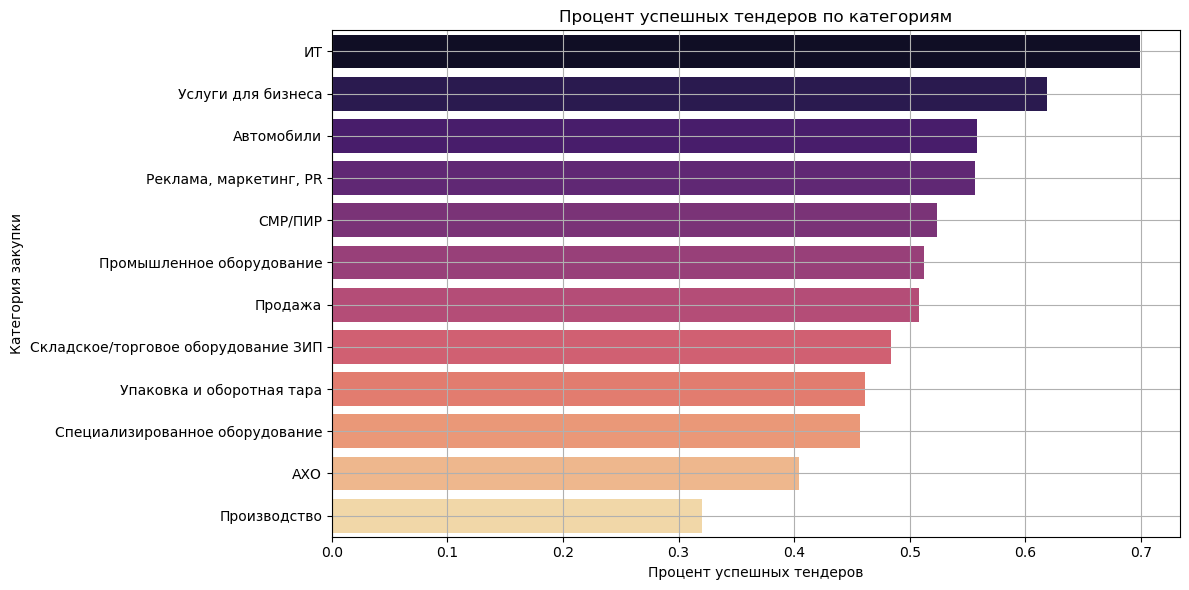

In [50]:
plt.figure(figsize=(12, 6))
sns.barplot(x='success_rate', y='procurement_category', data=category_conversion_2.sort_values(by='success_rate', ascending=False), palette='magma')
plt.title('Процент успешных тендеров по категориям')
plt.xlabel('Процент успешных тендеров')
plt.ylabel('Категория закупки')
plt.grid()
plt.tight_layout()

## Анализ менеджеров по комиссии и количеству успешных тендеров

In [51]:
manager_performance = data.groupby('bidzaar_manager').agg(
    total_commission=('paid_commission', 'sum'),
    successful_tenders=('is_successful', 'sum'),
    total_tenders=('customer', 'count'), avg_commission = ('paid_commission', 'mean')
).reset_index()
manager_performance['success_rate'] = manager_performance['successful_tenders'] / manager_performance['total_tenders']

In [52]:
manager_performance

,bidzaar_manager,total_commission,successful_tenders,total_tenders,avg_commission,success_rate
0,Агафонов,6.644849e+06,758,1360,4885.918412,0.557353
1,Иванова,6.804047e+05,77,219,3106.870934,0.351598
2,Кавинин,9.637265e+05,923,1313,733.988228,0.702970
3,Моисеев,2.605373e+05,32,107,2434.928330,0.299065
4,Опарина,1.467916e+05,20,127,1155.839252,0.157480
5,Тех.Поддержка,7.251197e+05,110,329,2204.011335,0.334347
6,Шредер,2.271533e+06,1147,1684,1348.891359,0.681116
7,Шульпина,7.693241e+04,13,83,926.896555,0.156627
8,Щеглов,1.073741e+06,116,197,5450.459786,0.588832


/var/folders/tx/fz_18w2n0m9d7n1sblwsw1rw0000gn/T/ipykernel_48279/1871177675.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_commission', y='bidzaar_manager', data=top_commission, palette='rocket')


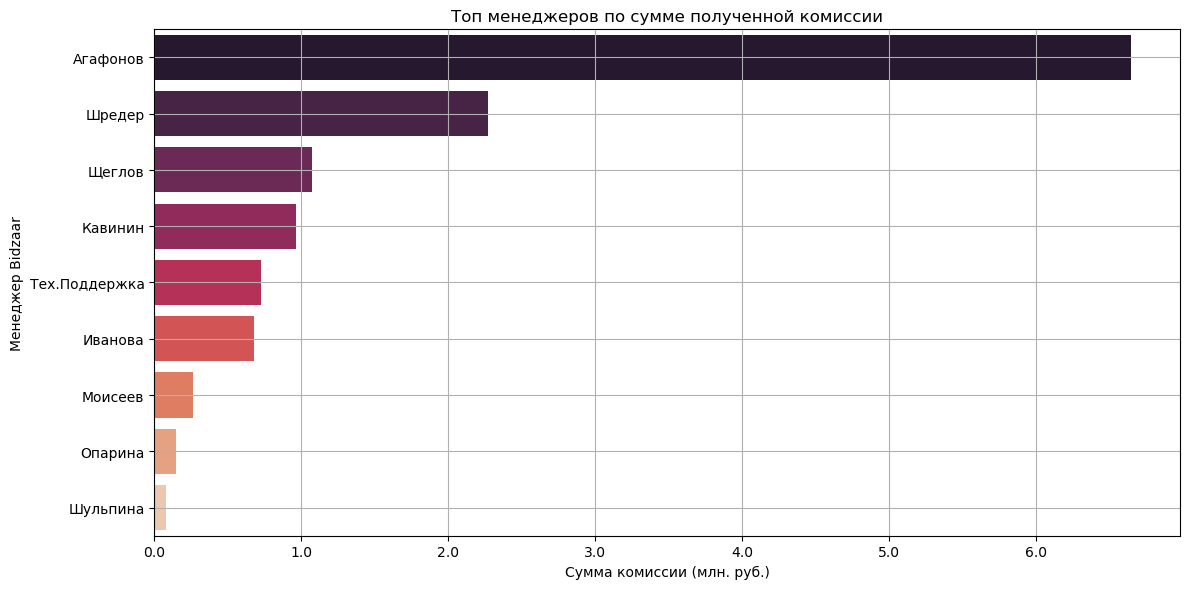

In [53]:
top_commission = manager_performance.sort_values(by='total_commission', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='total_commission', y='bidzaar_manager', data=top_commission, palette='rocket')
plt.title('Топ менеджеров по сумме полученной комиссии')
plt.xlabel('Сумма комиссии (млн. руб.)')
plt.ylabel('Менеджер Bidzaar')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{x/1000000:,.1f}'))
plt.tight_layout()
plt.grid()

/var/folders/tx/fz_18w2n0m9d7n1sblwsw1rw0000gn/T/ipykernel_48279/142996618.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='success_rate', y='bidzaar_manager', data=top_success_rate, palette='mako')


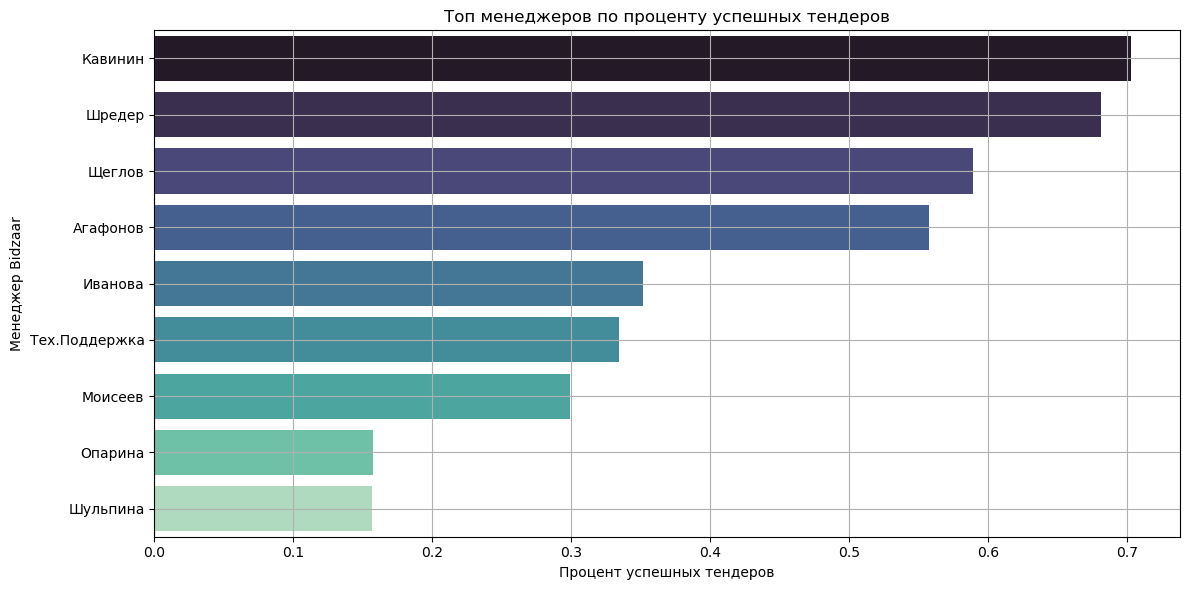

In [54]:
top_success_rate = manager_performance.sort_values(by='success_rate', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='success_rate', y='bidzaar_manager', data=top_success_rate, palette='mako')
plt.title('Топ менеджеров по проценту успешных тендеров')
plt.xlabel('Процент успешных тендеров')
plt.ylabel('Менеджер Bidzaar')
plt.tight_layout()
plt.grid()

In [55]:
avg_commission

NameError: name 'avg_commission' is not defined

In [ ]:
top_success_rate = manager_performance.sort_values(by='avg_commission', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='avg_commission', y='bidzaar_manager', data=top_success_rate)
plt.title('Топ менеджеров по средней комиссии')
plt.xlabel('Средняя комиссия')
plt.ylabel('Менеджер Bidzaar')
plt.tight_layout()
plt.grid()

# Метрики 

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5419 entries, 0 to 5438
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   customer                                       5419 non-null   object        
 1   publication_date                               5419 non-null   datetime64[ns]
 2   completion_date                                4797 non-null   datetime64[ns]
 3   first_publication_date                         5419 non-null   datetime64[ns]
 4   type                                           5419 non-null   object        
 5   procurement_category                           5419 non-null   object        
 6   company_turnover_in_billion_rubles             5419 non-null   float64       
 7   customer_industry                              5419 non-null   object        
 8   reason_for_publication_cancellation            141 non-null    

In [57]:
data['paid_commission'].head(10)

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4    13411.523469
5        0.000000
6    19923.415654
7        0.000000
8        0.000000
9        0.000000
Name: paid_commission, dtype: float64

In [58]:
data.head()

,customer,publication_date,completion_date,first_publication_date,type,procurement_category,company_turnover_in_billion_rubles,customer_industry,reason_for_publication_cancellation,bidzaar_manager,...,paid_commission,ID,Status,duration_days,pub_year,pub_month,participation_rate,is_successful,категория,pub_year_month
0,WPP,2021-10-22,2021-11-06,2021-11-08,открытая,Нет категории,4.5,Нон-фуд ритейл,NaN,Иванова,...,0.000000,WPP-65728,Completed,15.0,2021,10,0.022296,0,NaN,2021-10
1,WPP,2021-09-20,2021-10-18,2021-11-08,открытая,Нет категории,4.5,Нон-фуд ритейл,NaN,Иванова,...,0.000000,WPP-65729,Completed,28.0,2021,9,0.022676,0,NaN,2021-09
2,WPP,2021-10-19,2021-10-27,2021-11-08,открытая,Нет категории,4.5,Нон-фуд ритейл,NaN,Иванова,...,0.000000,WPP-65730,Completed,8.0,2021,10,0.067708,0,NaN,2021-10
3,WPP,2021-10-28,2021-11-03,2021-11-08,открытая,Нет категории,4.5,Нон-фуд ритейл,NaN,Иванова,...,0.000000,WPP-65731,Completed,6.0,2021,10,0.014038,0,NaN,2021-10
4,WPP,2021-12-19,2022-03-22,2021-11-08,открытая,Нет категории,4.5,Нон-фуд ритейл,NaN,Иванова,...,13411.523469,WPP-65732,Completed,93.0,2021,12,0.028708,1,NaN,2021-12


In [59]:
data['Status'].value_counts()

Status
Completed      4656
In progress     622
Canceled        141
Name: count, dtype: int64

In [60]:
data['procurement_category'].value_counts().head()

procurement_category
Нет категории                2173
ИТ                            664
СМР/ПИР                       646
Услуги для бизнеса            642
Упаковка и оборотная тара     338
Name: count, dtype: int64

In [61]:
pd.options.display.float_format = '{:,.2f}'.format

In [62]:
display(data.groupby('bidzaar_manager')['paid_commission'].sum().sort_values(ascending=False).head())

bidzaar_manager
Агафонов        6,644,849.04
Шредер          2,271,533.05
Щеглов          1,073,740.58
Кавинин           963,726.54
Тех.Поддержка     725,119.73
Name: paid_commission, dtype: float64

In [63]:
data.columns

Index(['customer', 'publication_date', 'completion_date',
       'first_publication_date', 'type', 'procurement_category',
       'company_turnover_in_billion_rubles', 'customer_industry',
       'reason_for_publication_cancellation', 'bidzaar_manager',
       'number_of_tender_participants_with_invitation',
       'number_of_participants_who_submitted_at', 'number_of_tender_winners',
       'paid_commission', 'ID', 'Status', 'duration_days', 'pub_year',
       'pub_month', 'participation_rate', 'is_successful', 'категория',
       'pub_year_month'],
      dtype='object')

In [64]:
# data[[ 'ID','customer', 'publication_date', 'completion_date',
#        'first_publication_date', 'type', 'procurement_category',
#        'company_turnover_in_billion_rubles', 'customer_industry',
#        'reason_for_publication_cancellation', 'bidzaar_manager',
#        'number_of_tender_participants_with_invitation',
#        'number_of_participants_who_submitted_at', 'number_of_tender_winners',
#        'paid_commission', 'Status', 'duration_days', 'pub_year',
#        'pub_month', 'participation_rate', 'is_successful', 'pub_year_month',
#        'reason_category', 'категория']].to_excel("Итоговая таблица.xlsx")